In [3]:
import pickle
# 导入向量化后的数据集
np_vectorized_tfidf = pickle.load(open('model/vectorized_generated_corpus_TWDoc2vec_Scaled_idf.pkl', 'rb'))

In [4]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

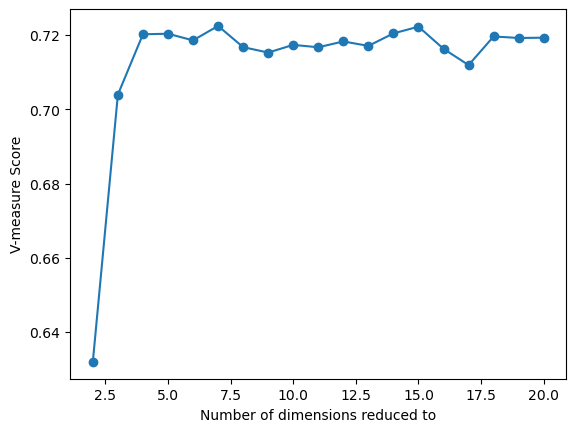

In [5]:
# 遍历 降维维度 找到最优解（利用 V-measure 评估）
v_measure_score_list = []

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn import metrics
for dimension in range(2, 21):
    # 画散点图之前，首先用 MDS (Multidimensional scaling) 降维
    mds = MDS(n_components=dimension)
    decomposition_data = mds.fit_transform(np_vectorized_tfidf)
    # 选用 k 值做 K-means 算法聚类
    y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data)
    # 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
    v_measure_score_list.append(metrics.v_measure_score(labels, y_pred))

# 画图
plt.plot(range(2, 21), v_measure_score_list, marker='o')
plt.xlabel('Number of dimensions reduced to')
plt.ylabel('V-measure Score')
plt.show()

In [6]:
v_measure_score_list

[0.6319624118400954,
 0.7039381395193884,
 0.7201934925858686,
 0.7203403797034453,
 0.7185564130547967,
 0.7224454458183688,
 0.7167293890104061,
 0.7152691009356097,
 0.7173441504367175,
 0.7166923632725568,
 0.7182676760146891,
 0.7170649228995679,
 0.7204343675600294,
 0.7222447042828647,
 0.7162802904378814,
 0.7119002054570661,
 0.7196092160533958,
 0.7191973214694307,
 0.7192777272919444]

In [7]:
# 最优解 降维维度
v_measure_score_list.index(max(v_measure_score_list)) + 2

7

In [8]:
from sklearn.manifold import MDS
# 选用最优解维数用 MDS 降维
mds = MDS(n_components=7)
decomposition_data = mds.fit_transform(np_vectorized_tfidf)

In [9]:
from sklearn.manifold import MDS
# 画散点图之前，首先用 MDS (Multidimensional scaling) 降维
mds = MDS(n_components=2)
decomposition_data_2d = mds.fit_transform(np_vectorized_tfidf)

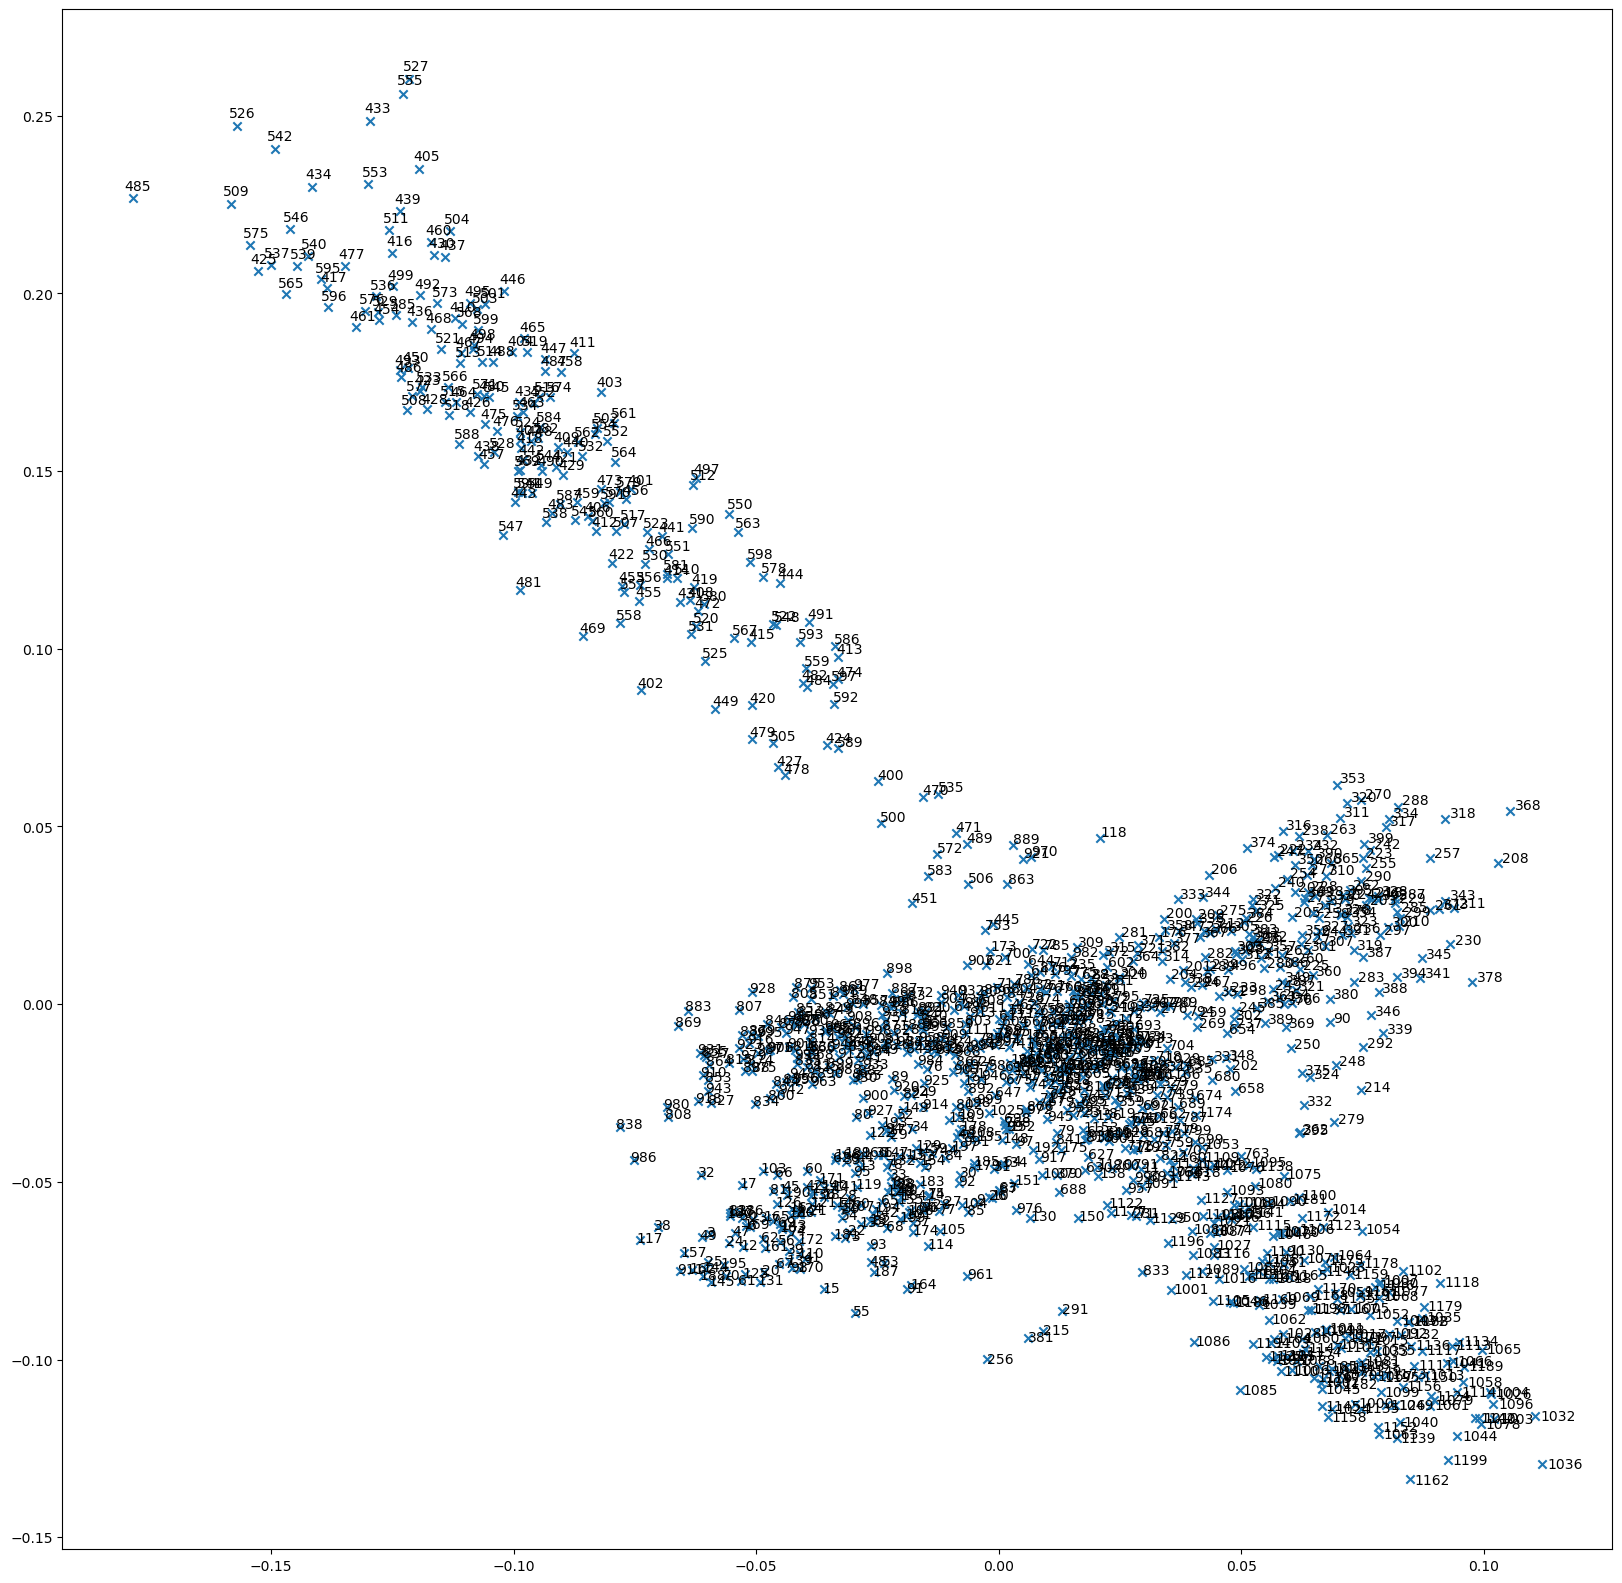

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], marker='x')
for i in range(len(decomposition_data_2d)):
    plt.text(decomposition_data_2d[:, 0][i] * 1.01, decomposition_data_2d[:, 1][i] * 1.01, i, fontsize=10)
plt.show()

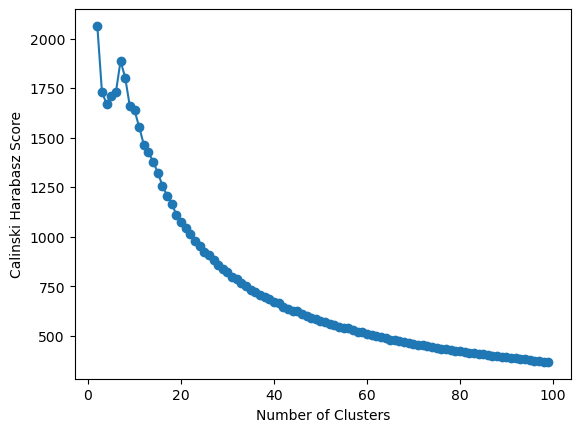

In [11]:
# K-means 算法聚类并利用 Calinski Harabasz Score 评估效果
from sklearn.cluster import KMeans
from sklearn import metrics
calinski_harabasz_score_list = []
for n_cluster in range(2, 100):
    y_pred = KMeans(n_clusters=n_cluster, init='k-means++', random_state=9).fit_predict(decomposition_data)
    current_score = metrics.calinski_harabasz_score(decomposition_data, y_pred)
    calinski_harabasz_score_list.append(current_score)

plt.plot(range(2,100), calinski_harabasz_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

In [12]:
calinski_harabasz_score_list.index(max(calinski_harabasz_score_list))

0

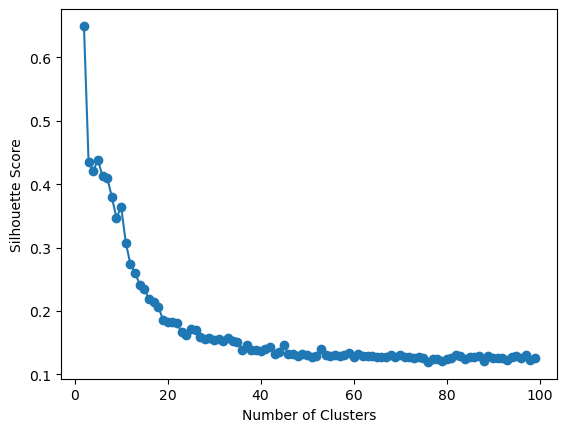

In [13]:
# K-means 算法聚类并利用 Silhouette Score（轮廓系数）评估效果
silhouette_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = metrics.silhouette_score(decomposition_data, km.labels_ , metric='euclidean')
    silhouette_score_list.append(current_score)

plt.plot(range(2,100), silhouette_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:
silhouette_score_list.index(max(silhouette_score_list))

0

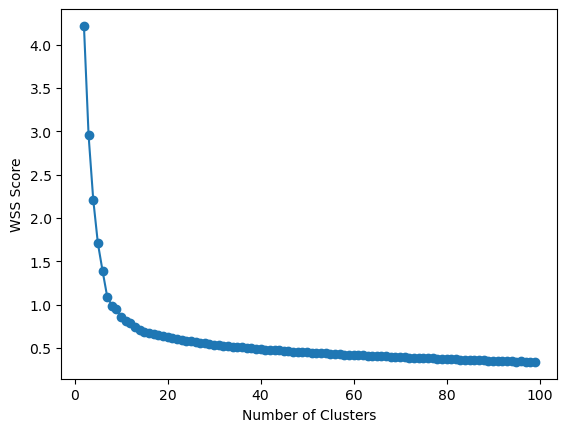

In [15]:
# K-means 算法聚类并利用 WSS（Within-cluster Sum of Squares）评估效果
WSS_score_list = []
for n_cluster in range(2, 100):
    km = KMeans(n_clusters=n_cluster, random_state=9)
    y_pred = km.fit_predict(decomposition_data)
    current_score = km.inertia_
    WSS_score_list.append(current_score)

plt.plot(range(2,100), WSS_score_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Score')
plt.show()

In [16]:
# 选用 k 值做 K-means 算法聚类
y_pred = KMeans(n_clusters=6, init='k-means++', random_state=9).fit_predict(decomposition_data)

In [17]:
print(y_pred[:10])

[4 4 4 4 2 4 4 4 4 4]


In [18]:
import numpy as np
# 用 dict 统计出所有类别的坐标
y_pred_dict = {}
for i in range(len(decomposition_data_2d)):
    if y_pred[i] not in y_pred_dict:
        y_pred_dict[y_pred[i]] = decomposition_data_2d[i].reshape(1, 2)
    else:
        y_pred_dict[y_pred[i]] = np.vstack((y_pred_dict[y_pred[i]], decomposition_data_2d[i]))

In [19]:
for key, value in y_pred_dict.items():
    print(key, value[:, 0].mean())

4 -0.02743105152051222
2 0.06683452156577219
0 -0.0005382766001996201
3 0.05872949615403914
5 -0.06158881181812795
1 -0.11267237738326615


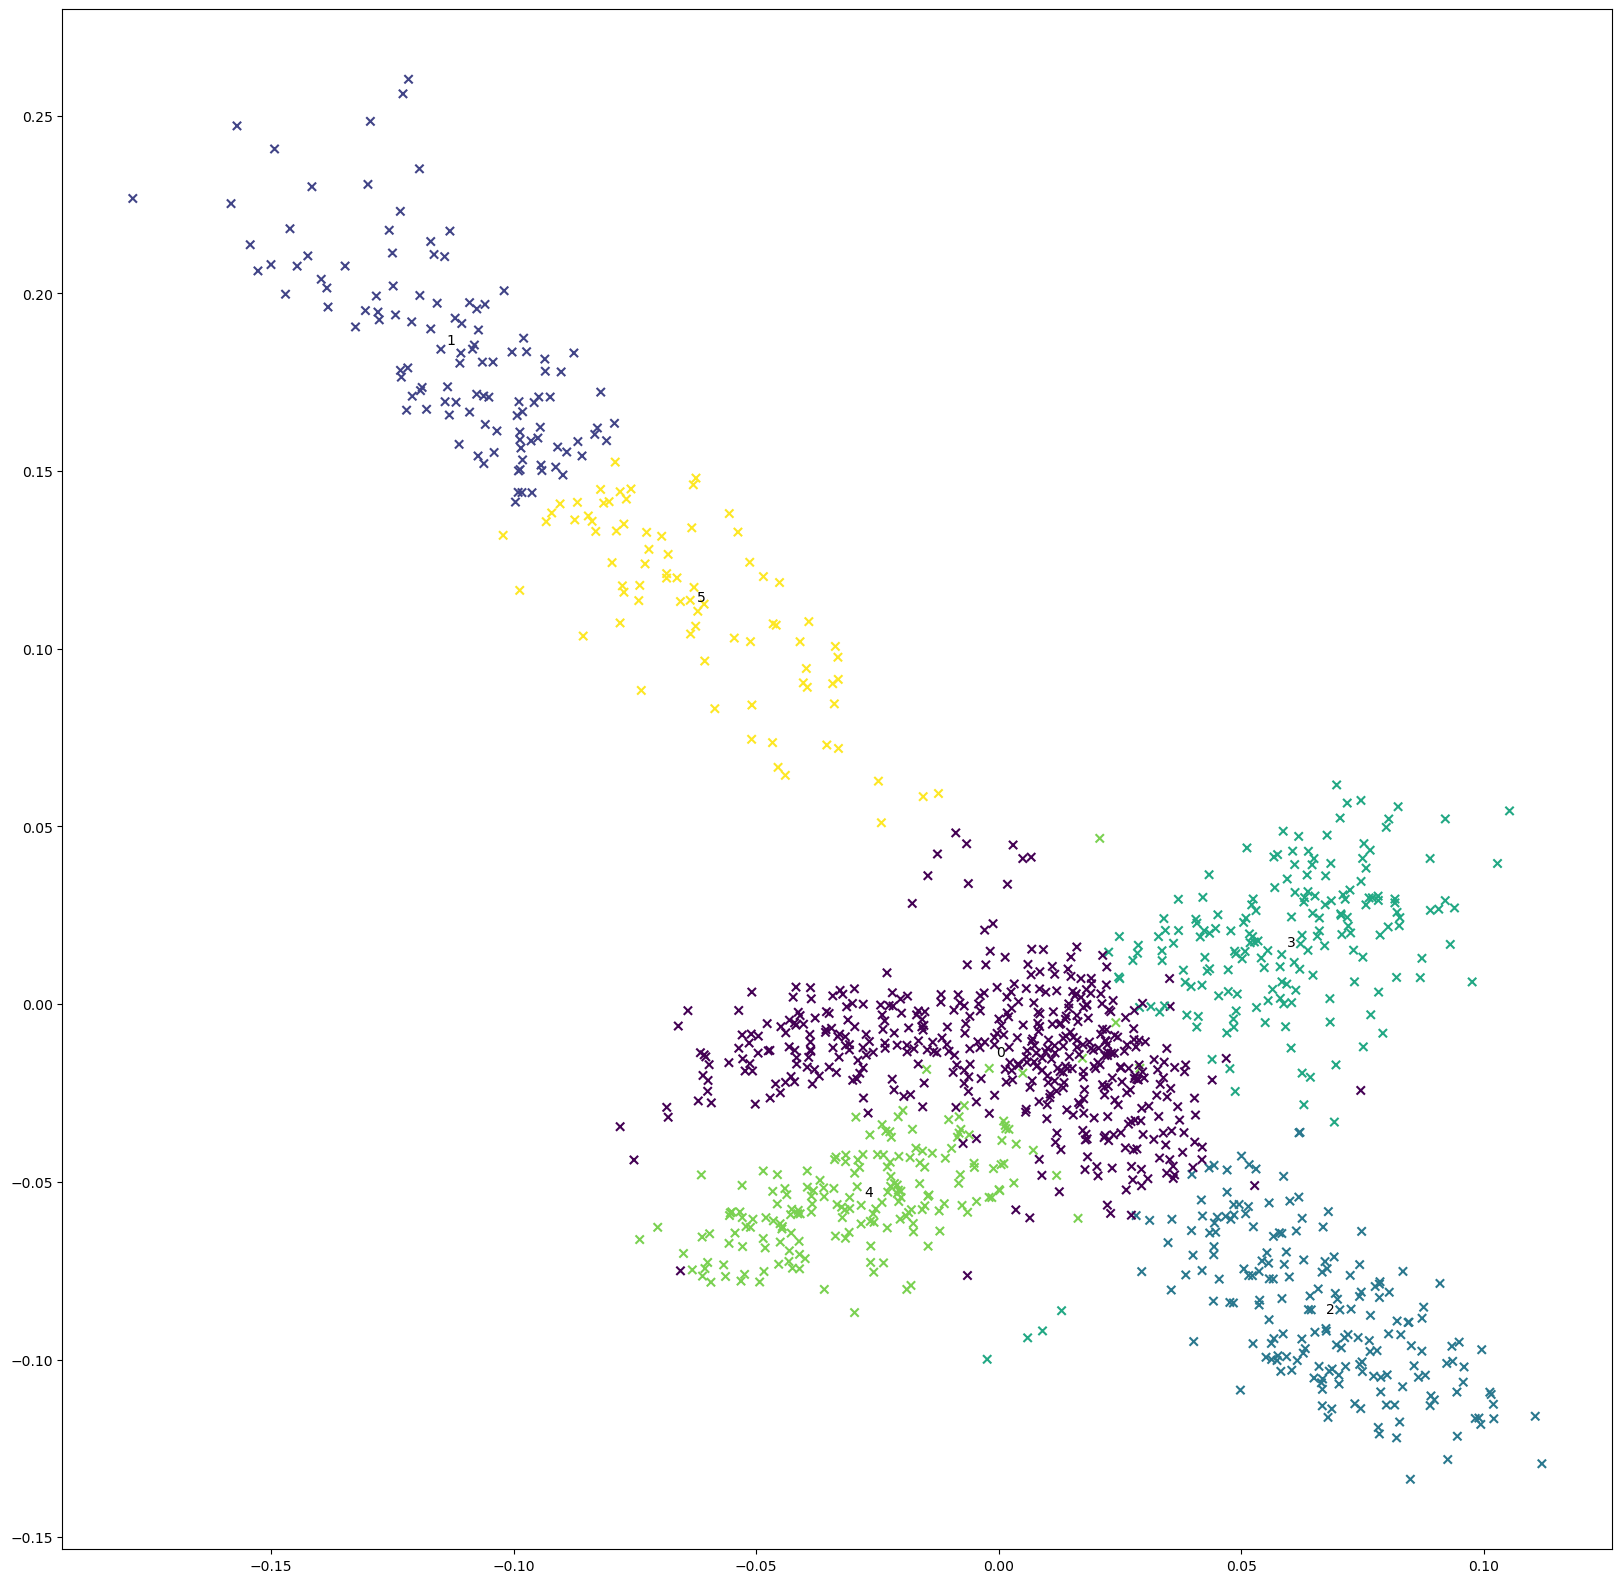

In [20]:
fig = plt.figure(figsize=(20, 20))
ax = plt.axes()
plt.scatter(decomposition_data_2d[:, 0], decomposition_data_2d[:, 1], c=y_pred, marker='x')
for key, value in y_pred_dict.items():
    plt.text(value[:, 0].mean() * 1.01, value[:, 1].mean() * 1.01, key, fontsize=10)
plt.show()

In [21]:
# 利用 Calinski Harabasz Score 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.calinski_harabasz_score(decomposition_data, y_pred)

1729.9961318379965

In [22]:
# 利用 Silhouette Score（轮廓系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
km = KMeans(n_clusters=6, random_state=9)
y_pred = km.fit_predict(decomposition_data)
metrics.silhouette_score(decomposition_data, km.labels_, metric='euclidean')

0.41254228809345356

In [23]:
# 读入正确标签（Labels）
labels = []
# 读入数据集
with open('sixTypes-GeneratedLabels.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        labels.append(line.strip('\n'))

In [24]:
labels[:10]

['CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP', 'CP']

In [25]:
# 利用 Homogeneity 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.homogeneity_score(labels, y_pred)

0.6890211586459489

In [26]:
# 利用 Completeness 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.completeness_score(labels, y_pred)

0.7577477243063697

In [27]:
# 利用 V-measure 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.v_measure_score(labels, y_pred)

0.7217520657445782

In [28]:
# 利用 Adjusted Rand Index（调整兰德系数）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_rand_score(labels, y_pred)

0.5814151653100242

In [29]:
# 利用 Adjusted Mutual Information Score（调整互信息）评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.adjusted_mutual_info_score(labels, y_pred)

0.7200307093209013

In [30]:
# 利用 Fowlkes-Mallows scores 评估当前 K-Means 聚类效果（利用 TFIDF 表征）
metrics.fowlkes_mallows_score(labels, y_pred)

0.6703613509957961